In [1]:
# Steps to solve Emergency vs Non-Emergency vehicle classification
#<ol>1. Loading the dataset</ol>
'''
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol><ol>Setting up the weight initialization technique</ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

'''


'\n<ol>2. Pre-processing the data</ol>\n<ol>3. Creating training and validation set</ol>\n<ol>4. Defining the model architecture</ol>\n<ol><ol>Setting up the weight initialization technique</ol></ol>\n<ol>5. Compiling the model</ol>\n<ol>6. Training the model</ol>\n<ol>7. Evaluating model performance</ol>\n\n'

In [2]:

## 1. Loading the dataset
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score


In [3]:
# reading the csv file
data = pd.read_csv('../data/Dataset/emergency_classification.csv')

# defining the seed value
seed = 42

# looking at first five rows of the data
data.head()

print(data.head())


  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [5]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

# shape of the images
X.shape

print(X.shape)


(2352, 224, 224, 3)


In [6]:
## 2. Pre-processing the data
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

print(X.shape)


(2352, 150528)


In [7]:
# minimum and maximum pixel values of images
X.min(), X.max()

# normalizing the pixel values
X = X / X.max()


# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

print(X.min(), X.max())

0.0 1.0


In [9]:
## 3. Creating training and validation set
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)


In [10]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

print(# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape))


((1646, 150528), (1646,)) ((706, 150528), (706,))


In [11]:
## 4. Defining the model architecture
### Setting up the weight initialization technique

# importing different initialization techniques
from keras.initializers import random_normal, glorot_normal, he_normal

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))


2024-02-04 11:46:18.893163: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-04 11:46:18.893202: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-04 11:46:18.893220: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-04 11:46:18.893616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 11:46:18.893914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
## 5. Compiling the model
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [13]:
## 6. Training the model
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))


Epoch 1/50


2024-02-04 11:47:45.223518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-04 11:47:45.257386: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 4s 216ms/step - loss: 0.7487 - accuracy: 0.5693 - val_loss: 0.6859 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 79ms/step - loss: 0.6852 - accuracy: 0.5863 - val_loss: 0.6857 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 74ms/step - loss: 0.6818 - accuracy: 0.5863 - val_loss: 0.6909 - val_accuracy: 0.5609
Epoch 4/50
13/13 [==============================] - 1s 73ms/step - loss: 0.6810 - accuracy: 0.5863 - val_loss: 0.6860 - val_accuracy: 0.5609
Epoch 5/50
13/13 [==============================] - 1s 73ms/step - loss: 0.6794 - accuracy: 0.5863 - val_loss: 0.6888 - val_accuracy: 0.5609
Epoch 6/50
13/13 [==============================] - 1s 74ms/step - loss: 0.6786 - accuracy: 0.5863 - val_loss: 0.6862 - val_accuracy: 0.5609
Epoch 7/50
13/13 [==============================] - 1s 74ms/step - loss: 0.6784 - accuracy: 0.5863 - val_loss: 0.6873 - val_accuracy: 0.5609
Epoch 8/50
13/13 [=====

23/23 [==============================] - 1s 29ms/step
Accuracy on validation set: 56.09065155807366 %


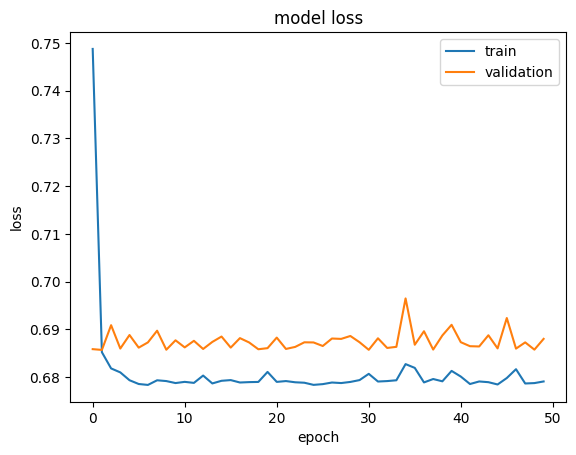

In [14]:
## 8. Evaluating model performance 
# accuracy on validation set
from sklearn.metrics import accuracy_score

# Predict probabilities
predicted_probabilities = model.predict(X_valid)

# Convert probabilities to binary predictions
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Now you can use accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predicted_labels) * 100, '%')
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()